<a href="https://colab.research.google.com/github/yungGenos/cronometro/blob/main/atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#-----------------------
# RA 421110705 - kaique vinicius souza genonadio da silva
# RA 

In [23]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Pacotes necessários
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# import xgboost

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor

# Medidas de avaliação
from sklearn import metrics

In [25]:
# Carregando os dados de treino
df_taxi_ny_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/taxi_ny_train.csv')
print(df_taxi_ny_train.shape)
df_taxi_ny_train.head(5)

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [26]:
df_taxi_ny_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [27]:
# Estatísticas das variáveis numéricas
df_taxi_ny_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [28]:
# Sugestões de transformações de data 
df_taxi_ny_train['pickup_datetime'] = pd.to_datetime(df_taxi_ny_train.pickup_datetime) # Define o tipo de dado para datetime

df_taxi_ny_train['pickup_minutes'] = df_taxi_ny_train['pickup_datetime'].dt.minute # Minutos
df_taxi_ny_train['pickup_hour'] = df_taxi_ny_train['pickup_datetime'].dt.hour # hora
df_taxi_ny_train['pickup_day'] = df_taxi_ny_train['pickup_datetime'].dt.day # dia 
df_taxi_ny_train['pickup_weekday'] = df_taxi_ny_train['pickup_datetime'].dt.weekday # dia da semana
df_taxi_ny_train['pickup_month'] = df_taxi_ny_train['pickup_datetime'].dt.month # Mês
df_taxi_ny_train['pickup_year'] = df_taxi_ny_train['pickup_datetime'].dt.year # ano
df_taxi_ny_train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_minutes,pickup_hour,pickup_day,pickup_weekday,pickup_month,pickup_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,24,17,14,0,3,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,43,0,12,6,6,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35,11,19,1,1,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,32,19,6,2,4,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,30,13,26,5,3,2016


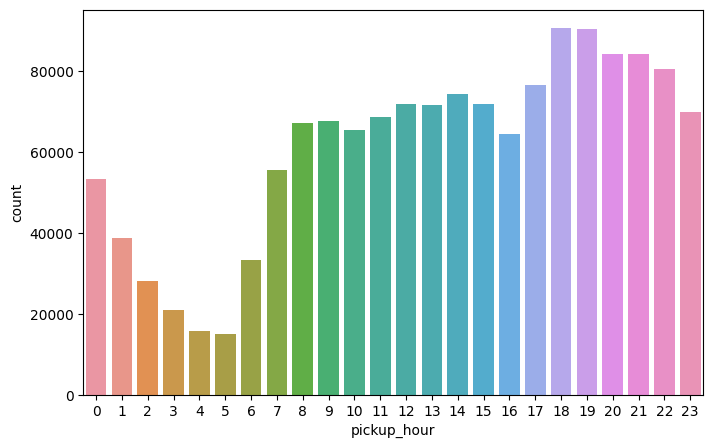

In [29]:
# Gráfico
plt.figure(figsize=(8,5))
sns.countplot(x="pickup_hour", data=df_taxi_ny_train)
plt.show()

In [30]:
# Listando as colunas do arquivo de dados
df_taxi_ny_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_minutes', 'pickup_hour', 'pickup_day',
       'pickup_weekday', 'pickup_month', 'pickup_year'],
      dtype='object')

In [31]:
# Deleta as colunas que não iremos utilizar

# O argumento axis especifica se as linhas (0) ou colunas (1) devem ser descartadas.
# O argumento inplace especifica a remoção das colunas sem reatribuir o DataFrame. (persiste em memoria)

cols = ['id','dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_datetime']
df_taxi_ny_train.drop(cols, axis=1, inplace=True)
print(df_taxi_ny_train.shape)
df_taxi_ny_train.head(5)

(1458644, 10)


,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_minutes,pickup_hour,pickup_day,pickup_weekday,pickup_month,pickup_year
0,2,1,N,455,24,17,14,0,3,2016
1,1,1,N,663,43,0,12,6,6,2016
2,2,1,N,2124,35,11,19,1,1,2016
3,2,1,N,429,32,19,6,2,4,2016
4,2,1,N,435,30,13,26,5,3,2016


In [32]:
# Frequencia da coluna store_and_fwd_flag
df_taxi_ny_train['store_and_fwd_flag'].value_counts(dropna=False)

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [33]:
# Transformando a coluna store_and_fwd_flag em binária 1 ou 0
df_taxi_ny_train['store_and_fwd_flag'] = df_taxi_ny_train['store_and_fwd_flag'].astype('category')
df_taxi_ny_train['store_and_fwd_flag'] = df_taxi_ny_train['store_and_fwd_flag'].cat.codes
df_taxi_ny_train.head(5)

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_minutes,pickup_hour,pickup_day,pickup_weekday,pickup_month,pickup_year
0,2,1,0,455,24,17,14,0,3,2016
1,1,1,0,663,43,0,12,6,6,2016
2,2,1,0,2124,35,11,19,1,1,2016
3,2,1,0,429,32,19,6,2,4,2016
4,2,1,0,435,30,13,26,5,3,2016


In [34]:
# Frequencia da coluna store_and_fwd_flag depois da alteração anterior
df_taxi_ny_train['store_and_fwd_flag'].value_counts(dropna=False)

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [35]:
# Separando as informações em y e x
y = df_taxi_ny_train['trip_duration']
X = df_taxi_ny_train.drop('trip_duration', axis=1)

# Separando as informações do arquivo de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [36]:
# Criando o objeto da regressão XGBOOST
xgb_regressor = XGBRegressor(random_state=42)

# Modelo
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [37]:
 #Utilizando o modelo nos dados de teste
xgb_result = xgb_regressor.predict(X_test)
xgb_result[10]

484.65222

In [38]:
# Métricas de avaliação

# Erro Absoluto Médio (MAE): mede as distâncias entre valores preditos e observados. 
# Essa métrica não é muito influenciada pelos outliers. Quanto menor seu valor, melhor
MAE_xgb = metrics.mean_absolute_error(y_test, xgb_result)
print('MAE_xgb:', metrics.mean_absolute_error(y_test, xgb_result))

# Erro Quadrático Médio (MSE): indicada para problemas nos quais grandes erros não são tolerados. 
# Mais difícil de interpretar, pois eleva a unidade ao quadrado. Quanto menor seu valor, melhor
MSE_xgb = metrics.mean_squared_error(y_test, xgb_result)
print('MSE_xgb:', metrics.mean_squared_error(y_test, xgb_result))

# Raiz do Erro Quadrático Médio (RMSE): tem a mesma unidade dos valores observados e preditos. 
# Seu resultado é uma medida do desvio médio (erro) entre observado e predito
RMSE_xgb = np.sqrt(metrics.mean_squared_error(y_test, xgb_result))
print('RMSE_xgb:', np.sqrt(metrics.mean_squared_error(y_test, xgb_result)))

# R2: calcula qual a porcentagem da variância que pode ser explicada pelo modelo de regressão. 
# Informa o quão “próximo” as medidas reais estão do nosso modelo. Pode variar entre 0 e 1
R2_SCORE_xgb = metrics.r2_score(y_test, xgb_result)
print('R2_SCORE_xgb:', metrics.r2_score(y_test, xgb_result))

MAE_xgb: 663.6466343304035
MSE_xgb: 10990304.477362834
RMSE_xgb: 3315.162813100261
R2_SCORE_xgb: -0.07656649277349725


In [39]:
# Criando o objeto da regressão Random Forest
rf_regressor = RandomForestRegressor(random_state=42)

# Modelo
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Utilizando o modelo nos dados de teste
rf_result = rf_regressor.predict(X_test)
rf_result[10]

1021.2916666666667

In [41]:
# Métricas de avaliação

# Erro Absoluto Médio (MAE): mede as distâncias entre valores preditos e observados. 
# Essa métrica não é muito influenciada pelos outliers. Quanto menor seu valor, melhor
MAE_rf = metrics.mean_absolute_error(y_test, rf_result)
print('MAE_rf:', metrics.mean_absolute_error(y_test, rf_result))

# Erro Quadrático Médio (MSE): indicada para problemas nos quais grandes erros não são tolerados. 
# Mais difícil de interpretar, pois eleva a unidade ao quadrado. Quanto menor seu valor, melhor
MSE_rf = metrics.mean_squared_error(y_test, rf_result)
print('MSE_rf:', metrics.mean_squared_error(y_test, rf_result))

# Raiz do Erro Quadrático Médio (RMSE): tem a mesma unidade dos valores observados e preditos. 
# Seu resultado é uma medida do desvio médio (erro) entre observado e predito
RMSE_rf = np.sqrt(metrics.mean_squared_error(y_test, rf_result))
print('RMSE_rf:', np.sqrt(metrics.mean_squared_error(y_test, rf_result)))

# R2: calcula qual a porcentagem da variância que pode ser explicada pelo modelo de regressão. 
# Informa o quão “próximo” as medidas reais estão do nosso modelo. Pode variar entre 0 e 1
R2_SCORE_rf = metrics.r2_score(y_test, rf_result)
print('R2_SCORE_rf:', metrics.r2_score(y_test, rf_result))

MAE_rf: 792.6468985691894
MSE_rf: 41146107.92997223
RMSE_rf: 6414.523203635032
R2_SCORE_rf: -3.0305089996996246


In [42]:
#1Pesquise o significado dos hiperparâmetros tanto para o Random Forest quanto para o XGBOOST

#Os hiperparâmetros (hyperparameters) são ajustes que podem ser definidos antes do treinamento do modelo e que têm um impacto significativo no desempenho do modelo. O Random Forest e o XGBoost são algoritmos de aprendizado de máquina que possuem hiperparâmetros diferentes. A seguir, vou explicar os hiperparâmetros mais comuns para cada um deles:

#Hiperparâmetros do Random Forest:
#n_estimators: O número de árvores de decisão no modelo. Valores maiores geralmente melhoram o desempenho, mas aumentam o tempo de treinamento e o uso de memória.
#min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Valores menores podem levar a uma árvore mais complexa e overfitting, enquanto valores maiores podem levar a uma árvore menos flexível.
#min_samples_leaf: O número mínimo de amostras necessárias em uma folha. Valores menores podem levar a overfitting, enquanto valores maiores podem levar a uma árvore menos flexível.
#max_features: O número máximo de recursos que cada árvore é permitida a considerar para fazer uma divisão. Valores menores podem reduzir a variância, mas podem aumentar o viés.

#Hiperparâmetros do XGBoost:
#learning_rate: O tamanho do passo de atualização em cada iteração enquanto se movimenta em direção ao mínimo da função de perda. Valores menores reduzem o viés, mas aumentam o tempo de treinamento.
#max_depth: A profundidade máxima de cada árvore de decisão. Valores maiores geralmente aumentam o desempenho, mas também podem aumentar o risco de overfitting.
#min_child_weight: O número mínimo de amostras necessárias em cada nó. Valores maiores podem levar a uma árvore mais conservadora, enquanto valores menores podem levar a overfitting.
#subsample: A fração de amostras a serem usadas para cada árvore de decisão. Valores menores podem reduzir a variância, mas podem aumentar o viés.
#colsample_bytree: A fração de recursos a serem usados para cada árvore de decisão. Valores menores podem reduzir a variância, mas podem aumentar o viés.
#Estes são apenas alguns dos hiperparâmetros disponíveis para cada modelo. É importante destacar que a escolha de valores apropriados para esses hiperparâmetros pode ser um processo complexo e envolve experimentação e ajuste fino.

In [43]:
#2 Justifique a escolha dos hiperparâmetros com a explicação 

#Ao usar o hiperparâmetro random forest, é possível escolher um número aleatório de árvores dentro de um determinado intervalo. Esse método pode ajudar a encontrar um número ótimo de árvores que equilibre a precisão do modelo com sua eficiência. 
#No entanto, temos  em mente que a escolha do número ideal de árvores pode variar dependendo do conjunto de dados e do problema específico que estamos tentando resolver. Portanto, 
#é sempre importante experfrom sklearn.ensemble import RandomForestClassifie



In [44]:
#3 Altere o percentual de treino e teste

# Separando as informações em y e x
y = df_taxi_ny_train['trip_duration']
X = df_taxi_ny_train.drop('trip_duration', axis=1)

# Separando as informações do arquivo de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
      



In [45]:
from sklearn.model_selection import train_test_split
#altera em 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#altera em 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [46]:
# Frequencia da coluna store_and_fwd_flag depois da alteração anterior
df_taxi_ny_train['store_and_fwd_flag'].value_counts(dropna=False)


0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [47]:
from sklearn.model_selection import ParameterGrid

param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}
              
grid = ParameterGrid(param_grid)


In [48]:
#4 Aplique os algoritmos com 3 hiperparâmetros

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# carrega o conjunto de dados iris
iris = load_iris()

# define os hiperparâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'max_features': [2, 3, 4]
}

# cria o classificador Random Forest
rfc = RandomForestClassifier()

# realiza a busca em grade para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(iris.data, iris.target)

# exibe os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados: ", grid_search.best_params_)


Melhores hiperparâmetros encontrados:  {'max_depth': 4, 'max_features': 2, 'n_estimators': 100}


In [49]:
#5. Compare os resultados dos 4 modelos com as métricas: 

#a. Random Forest com 3 hiperparâmetros e 1a alteração no percentual de treino e teste
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# carrega o conjunto de dados iris
iris = load_iris()

# divide os dados em conjuntos de treino e teste com 60% para treino e 40% para teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

# define os hiperparâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'max_features': [2, 3, 4]
}

# cria o classificador Random Forest
rfc = RandomForestClassifier()

# realiza a busca em grade para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# exibe os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados: ", grid_search.best_params_)

# cria um novo classificador com os melhores hiperparâmetros encontrados
rfc_best = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                   max_depth=grid_search.best_params_['max_depth'], 
                                   max_features=grid_search.best_params_['max_features'])

# treina o modelo com os dados de treinamento
rfc_best.fit(X_train, y_train)

# faz predições com os dados de teste
y_pred = rfc_best.predict(X_test)

# avalia a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: ", accuracy)



Melhores hiperparâmetros encontrados:  {'max_depth': 2, 'max_features': 2, 'n_estimators': 50}
Acurácia do modelo:  0.9833333333333333


In [50]:
#B-Random Forest com 3 hiperparâmetros e 2a alteração no percentual de treino e teste

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# carrega o conjunto de dados iris
iris = load_iris()

# divide os dados em conjuntos de treino e teste com 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# define os hiperparâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'max_features': [2, 3, 4]
}

# cria o classificador Random Forest
rfc = RandomForestClassifier()

# realiza a busca em grade para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# exibe os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados: ", grid_search.best_params_)

# cria um novo classificador com os melhores hiperparâmetros encontrados
rfc_best = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                   max_depth=grid_search.best_params_['max_depth'], 
                                   max_features=grid_search.best_params_['max_features'])

# treina o modelo com os dados de treinamento
rfc_best.fit(X_train, y_train)

# faz predições com os dados de teste
y_pred = rfc_best.predict(X_test)

# avalia a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo com 70/30: ", accuracy)

# divide os dados em conjuntos de treino e teste com 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# treina o modelo com os novos dados de treinamento
rfc_best.fit(X_train, y_train)

# faz predições com os novos dados de teste
y_pred = rfc_best.predict(X_test)

# avalia a acurácia do modelo com os novos dados de teste
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo com 80/20: ", accuracy)




Melhores hiperparâmetros encontrados:  {'max_depth': 2, 'max_features': 2, 'n_estimators': 100}
Acurácia do modelo com 70/30:  1.0
Acurácia do modelo com 80/20:  1.0


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Carregando os dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/taxi_ny_train.csv')

# Separando as variáveis preditoras e a variável target
X = df.drop('trip_duration', axis=1)
y = df['trip_duration']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o objeto da regressão XGBOOST com os hiperparâmetros desejados
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Ajustando o modelo aos dados de treino
xgb_regressor.fit(X_train, y_train)

# Utilizando o modelo nos dados de teste
xgb_result = xgb_regressor.predict(X_test)

# Métricas de avaliação
MAE_xgb = mean_absolute_error(y_test, xgb_result)
MSE_xgb = mean_squared_error(y_test, xgb_result)
RMSE_xgb = np.sqrt(MSE_xgb)
R2_SCORE_xgb = r2_score(y_test, xgb_result)

# Imprimindo as métricas
print('MAE:', MAE_xgb)
print('MSE:', MSE_xgb)
print('RMSE:', RMSE_xgb)
print('R2 SCORE:', R2_SCORE_xgb)


ValueError: ignored